In [1]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    #  transforms.Resize(256),
    #  transforms.CenterCrop(256),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#trainset = datasets.ImageFolder(root='../input/flowers-recognition/', transform=transform)

trainset = datasets.ImageFolder(root='train_this', transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=8,
    shuffle=True,
    num_workers=2,
    collate_fn=None,
    pin_memory=False,
 )

#testset = datasets.ImageFolder(root='../input/flowers-recognition', transform=transform)

testset = datasets.ImageFolder(root='train_this' , transform=transform)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=8,
    shuffle=True,
    num_workers=2,
    collate_fn=None,
    pin_memory=False,
 )
classes = ("class_1" , "class_2" , "class_3")

print(trainloader)

In [5]:
def imshow(img , labels):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg.transpose((1, 2, 0)))
    plt.show()
    print(labels)

8


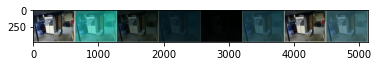

tensor([0, 1, 1, 1, 2, 1, 0, 1])


torch.Size([8, 3, 480, 640])

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(len(images))
# show images
imshow(torchvision.utils.make_grid(images) , labels)
# print labels
images.size()

In [9]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork,self).__init__()

        # self.layer1 = nn.Sequential(nn.Conv2d(3,1,3),nn.BatchNorm2d(1),nn.ReLU())
        # self.layer2 = nn.Sequential(nn.Conv2d(1,1,3),nn.BatchNorm2d(1),nn.ReLU())
        # self.layer3 = nn.Sequential(nn.Conv2d(1,1,3),nn.BatchNorm2d(1),nn.ReLU())
        # self.layer4 = nn.Sequential(nn.Conv2d(1,1,3),nn.BatchNorm2d(1),nn.ReLU())
        # self.fc1 = nn.Linear(1*248*248,5)
        self.layer1 = nn.Sequential(nn.Conv2d(3,16,3),nn.BatchNorm2d(16),nn.ReLU(),nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(16,32,3),nn.BatchNorm2d(32),nn.ReLU(),nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(nn.Conv2d(32,64,3),nn.BatchNorm2d(64),nn.ReLU(),nn.MaxPool2d(2))
        self.layer4 = nn.Sequential(nn.Conv2d(64,32,3),nn.BatchNorm2d(32),nn.ReLU(),nn.MaxPool2d(2))
        self.layer5 = nn.Sequential(nn.Conv2d(32,16,3),nn.BatchNorm2d(16),nn.ReLU(),nn.MaxPool2d(2))
        self.layer6 = nn.Sequential(nn.Conv2d(16,3,3),nn.BatchNorm2d(3),nn.ReLU(),nn.MaxPool2d(2))
        # self.layer7= nn.Sequential(nn.Conv2d(3,3,3),nn.BatchNorm2d(3),nn.ReLU(),nn.MaxPool2d(2))
        # self.layer8 = nn.Sequential(nn.Conv2d(16,3,3),nn.BatchNorm2d(3),nn.ReLU(),nn.MaxPool2d(2))
        self.fc1 = nn.Linear(120,3)
        self.sig = nn.Sigmoid()

    def forward(self,x):
        #print(x.shape)
        out = self.layer1(x)
        #print(out.shape)
        out = self.layer2(out)
        #print(out.shape)
        out = self.layer3(out)
        #print(out.shape)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        # out = self.layer7(out)
        # out = self.layer8(out)
        #print(out.shape)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.sig(out)
        return out

In [10]:
NN = NeuralNetwork().to(device)
print(device)

cpu


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(NN.parameters(), lr=0.001)

In [35]:
num_epochs = 100
for epoch in range(100):
    print('Epoch Start')
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device=device)
        labels = labels.to(device=device)
        optimizer.zero_grad()
        outputs = NN(inputs)

        op = [list(outputs[i]) for i in range(int(labels.shape[0]))]
        leb = list(labels)
        s = [[op[a].index(max(op[a])),int(labels[a])] for a in range(int(labels.shape[0]))]
        print(s)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # print('done iteration')
        if (i+1) % 2 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], [{loss.item()}]')
    print('Epoch End')
    
    
print('Training Finished')

Epoch Start
[[2, 2], [1, 1], [2, 2], [0, 0], [1, 1], [1, 0], [2, 2], [2, 1]]
[[1, 2], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0]]
Epoch [1/100], [0.6659242510795593]
[[0, 0], [0, 0], [2, 2], [1, 1], [0, 1], [1, 1], [0, 0], [2, 2]]
[[1, 1], [0, 0], [2, 2], [0, 1], [2, 2], [1, 1], [2, 2], [0, 0]]
Epoch [1/100], [0.5951990485191345]
[[1, 1], [1, 1], [2, 2], [1, 1], [2, 2], [0, 1], [2, 2], [2, 2]]
[[0, 0], [0, 1], [2, 2], [1, 1], [1, 1], [2, 2], [1, 2], [0, 0]]
Epoch [1/100], [0.8723769187927246]
[[0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [2, 2], [0, 0], [0, 0]]
[[1, 1], [2, 2], [1, 2], [1, 2], [1, 1], [2, 2], [0, 0], [0, 0]]
Epoch [1/100], [0.8853540420532227]
[[1, 1], [1, 1], [2, 2], [0, 0], [2, 2], [0, 0], [2, 2], [0, 0]]
[[1, 1], [0, 1], [2, 2], [0, 0], [0, 1], [0, 0], [0, 1], [2, 2]]
Epoch [1/100], [0.948640763759613]
[[0, 1], [0, 0], [0, 0], [1, 1], [2, 2], [1, 1], [0, 0], [0, 0]]
[[0, 0], [2, 2], [1, 1], [2, 2], [2, 2], [2, 2], [0, 1], [2, 2]]
Epoch [1/100], [0.59941929578

Traceback (most recent call last):
  File "/home/sujay/miniconda3/envs/sujay_under_water/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/home/sujay/miniconda3/envs/sujay_under_water/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/sujay/miniconda3/envs/sujay_under_water/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/home/sujay/miniconda3/envs/sujay_under_water/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [36]:
# NN.eval()  
torch.save(NN.state_dict() , '/home/sujay/6th sem/ALL_SUJAY_STUFF_IN_THIS_DRIVE/Flower_CNN/classification_water_types.pth')
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load('/home/sujay/6th sem/ALL_SUJAY_STUFF_IN_THIS_DRIVE/Flower_CNN/classification_water_types.pth'))
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the 10000 test images: {}%'\
          .format(100 * correct / total))


Accuracy of the model on the 10000 test images: 84.57446808510639%


<All keys matched successfully>